http://matrix.skku.ac.kr/math4AI-tools/cosine_similarity/

In [1]:
import numpy as np
def cos_similarity(v1,v2):
    dot_product = np.dot(v1,v2)
    l2_norm = np.sqrt(sum(np.square(v1)))*np.sqrt(sum(np.square(v2)))
    similarity = dot_product/l2_norm
    
    return similarity

In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer

doc_list = ['if you take the blue pill, the story ends' ,
            'if you take the red pill, you stay in Wonderland',
            'if you take the red pill, I show you how deep the rabbit hole goes']

tfidf_vect_simple = TfidfVectorizer()
feature_vect_simple = tfidf_vect_simple.fit_transform(doc_list)
print(feature_vect_simple)

  (0, 2)	0.41556360057939173
  (0, 13)	0.41556360057939173
  (0, 8)	0.24543855687841593
  (0, 0)	0.41556360057939173
  (0, 15)	0.49087711375683185
  (0, 14)	0.24543855687841593
  (0, 17)	0.24543855687841593
  (0, 6)	0.24543855687841593
  (1, 16)	0.39624495215024286
  (1, 7)	0.39624495215024286
  (1, 12)	0.39624495215024286
  (1, 10)	0.3013544995034864
  (1, 8)	0.2340286519091622
  (1, 15)	0.2340286519091622
  (1, 14)	0.2340286519091622
  (1, 17)	0.4680573038183244
  (1, 6)	0.2340286519091622
  (2, 3)	0.3098560092999078
  (2, 4)	0.3098560092999078
  (2, 9)	0.3098560092999078
  (2, 1)	0.3098560092999078
  (2, 5)	0.3098560092999078
  (2, 11)	0.3098560092999078
  (2, 10)	0.23565348175165166
  (2, 8)	0.1830059506093466
  (2, 15)	0.3660119012186932
  (2, 14)	0.1830059506093466
  (2, 17)	0.3660119012186932
  (2, 6)	0.1830059506093466


In [3]:
feature_vect_dense = feature_vect_simple.todense()

vect1 = np.array(feature_vect_dense[0]).reshape(-1,)
vect2 = np.array(feature_vect_dense[1]).reshape(-1,)

similarity_simple = cos_similarity(vect1,vect2)
print(similarity_simple)

0.4020775821495014


In [4]:
vect1 = np.array(feature_vect_dense[0]).reshape(-1,)
vect2 = np.array(feature_vect_dense[2]).reshape(-1,)

similarity_simple = cos_similarity(vect1,vect2)
print(similarity_simple)

vect1 = np.array(feature_vect_dense[2]).reshape(-1,)
vect2 = np.array(feature_vect_dense[1]).reshape(-1,)

similarity_simple = cos_similarity(vect1,vect2)
print(similarity_simple)

0.40425044775948626
0.4564729602616639


In [5]:
from sklearn.metrics.pairwise import cosine_similarity

similarity_simple_pair = cosine_similarity(feature_vect_simple,feature_vect_simple)
similarity_simple_pair

array([[1.        , 0.40207758, 0.40425045],
       [0.40207758, 1.        , 0.45647296],
       [0.40425045, 0.45647296, 1.        ]])

In [8]:
from nltk.stem import WordNetLemmatizer
import nltk
import string

remove_punct_dict = dict((ord(punct),None) for punct in string.punctuation)
lemma = WordNetLemmatizer()

def LemTokens(tokens):
    return [lemma.lemmatize(token) for token in tokens]

def LemNormalize(text):
    return LemTokens(nltk.word_tokenize(text.lower().translate(remove_punct_dict)))

In [9]:
import pandas as pd
import glob, os
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

path = r'C:\cakd5\workspace\m8_머신러닝응용\dataset\OpinosisDataset1.0\topics'

all_files = glob.glob(os.path.join(path,'*.data'))
filename_list = []
opinion_text = []

for file_ in all_files:
    df = pd.read_table(file_, index_col = None, header=0,encoding='latin1')
    filename_ = file_.split('\\')[-1]
    filename_ = filename_.split('.')[0]
    
    filename_list.append(filename_)
    opinion_text.append(df.to_string())
# 파일명 리스트와 파일내용 리스트를 DataFrame으로 생성    
document_df = pd.DataFrame({'filename':filename_list,'opinion_text':opinion_text})

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer(tokenizer = LemNormalize, stop_words = 'english',ngram_range=(1,2),min_df=0.05,max_df=0.85)
feature_vect = tfidf_vect.fit_transform(document_df['opinion_text'])

km_cluster = KMeans(n_clusters = 5, max_iter=10000,random_state=0)
km_cluster.fit(feature_vect)
cluster_label = km_cluster.labels_
cluster_centers = km_cluster.cluster_centers_

document_df['cluster_label'] = cluster_label
document_df.head()

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\sklearn\feature_extraction\text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


,filename,opinion_text,cluster_label
0,accuracy_garmin_nuvi_255W_gps,...,0
1,bathroom_bestwestern_hotel_sfo,...,1
2,battery-life_amazon_kindle,...,3
3,battery-life_ipod_nano_8gb,...,3
4,battery-life_netbook_1005ha,...,3


In [14]:
from sklearn.metrics.pairwise import cosine_similarity

hotel_indexes = document_df[document_df['cluster_label']==1].index
print(hotel_indexes)

comparison_docname = document_df.iloc[hotel_indexes[0]]['filename']
print(comparison_docname)


similarity_pair = cosine_similarity(feature_vect[hotel_indexes[0]],feature_vect[hotel_indexes[1:]])
similarity_pair

Int64Index([1, 13, 14, 15, 20, 21, 24, 28, 30, 31, 32, 38, 39, 40, 45, 46], dtype='int64')
bathroom_bestwestern_hotel_sfo


array([[0.0430688 , 0.05221059, 0.06189595, 0.05846178, 0.06193118,
        0.03638665, 0.11742762, 0.38038865, 0.32619948, 0.51442299,
        0.11282857, 0.13989623, 0.1386783 , 0.09518068, 0.07049362]])

Text(0.5, 1.0, 'bathroom_bestwestern_hotel_sfo')

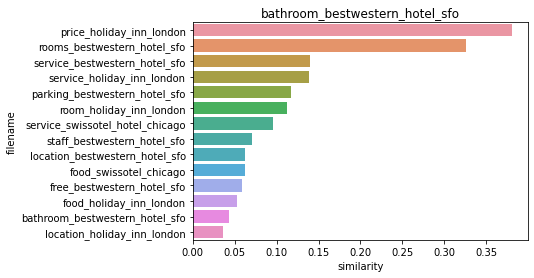

In [17]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

sorted_index = similarity_pair.argsort()[:,::-1]
sorted_index = sorted_index[:,1:]

hotel_sorted_indexes = hotel_indexes[sorted_index.reshape(-1)]

hotel_1_sim_value = np.sort(similarity_pair.reshape(-1))[::-1]
hotel_1_sim_value = hotel_1_sim_value[1:]

hotel_1_sim_df = pd.DataFrame()
hotel_1_sim_df['filename'] = document_df.iloc[hotel_sorted_indexes]['filename']
hotel_1_sim_df['similarity'] = hotel_1_sim_value

sns.barplot(x='similarity',y='filename',data=hotel_1_sim_df)
plt.title(comparison_docname)